In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikrishnan/boston-house-prices")

print("Path to dataset files:", path)

c:\Users\Abhishek\Documents\boston-house-pricing\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Abhishek\.cache\kagglehub\datasets\vikrishnan\boston-house-prices\versions\1


In [3]:
file_path = r'C:\Users\Abhishek\.cache\kagglehub\datasets\vikrishnan\boston-house-prices\versions\1\housing.csv'

### The Boston Housing Dataset

The Boston Housing Dataset is derived from information collected by the U.S. Census Service concerning housing in the area of Boston, MA. The following describes the dataset columns:

#### Column Descriptions

- **CRIM** - Per capita crime rate by town  
- **ZN** - Proportion of residential land zoned for lots over 25,000 sq.ft.  
- **INDUS** - Proportion of non-retail business acres per town  
- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
- **NOX** - Nitric oxides concentration (parts per 10 million)  
- **RM** - Average number of rooms per dwelling  
- **AGE** - Proportion of owner-occupied units built prior to 1940  
- **DIS** - Weighted distances to five Boston employment centres  
- **RAD** - Index of accessibility to radial highways  
- **TAX** - Full-value property-tax rate per $10,000  
- **PTRATIO** - Pupil-teacher ratio by town  
- **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
- **LSTAT** - % lower status of the population  
- **MEDV** - Median value of owner-occupied homes in $1000's  


In [4]:

data = pd.read_csv(file_path, header=None, sep='\s+')

# Define column names
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
boston_df = pd.DataFrame(data.values, columns=column_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


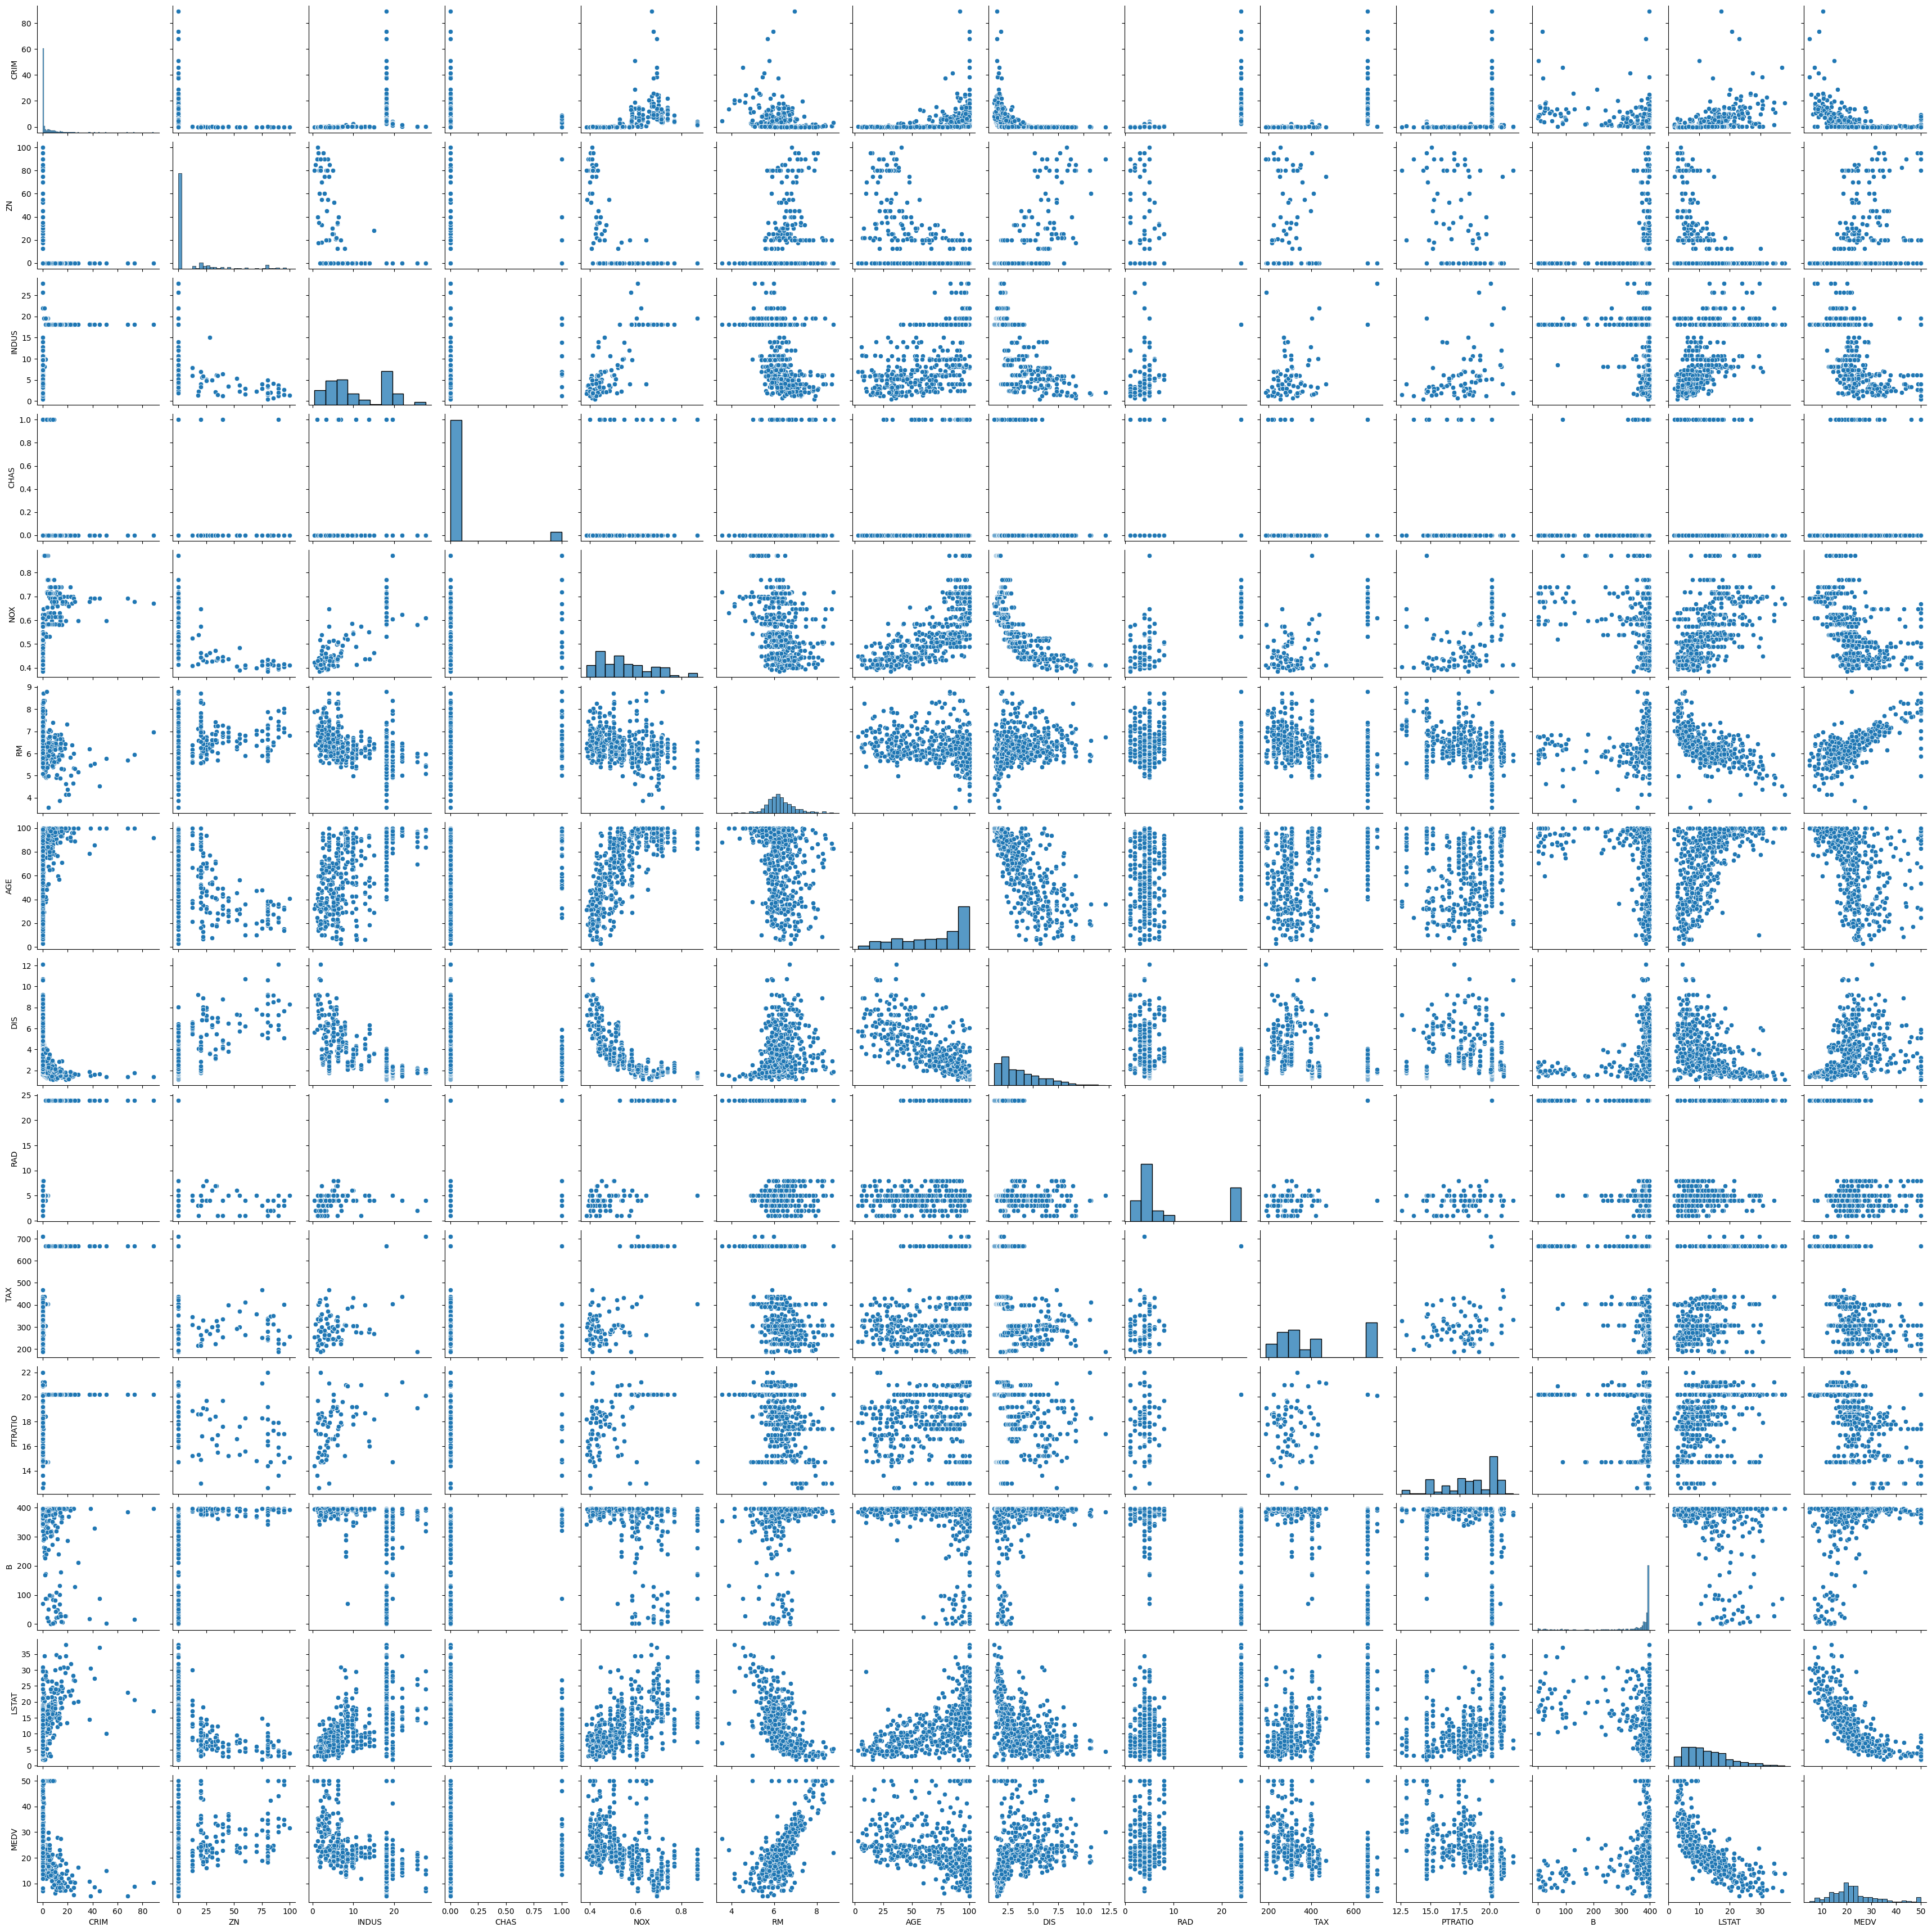

In [9]:
sns.pairplot(boston_df)

Text(0, 0.5, 'Price')

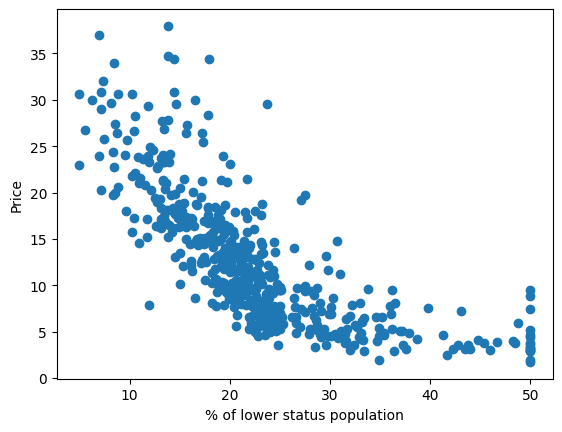

In [10]:
plt.scatter(boston_df['MEDV'], boston_df['LSTAT'])
plt.xlabel('% of lower status population')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

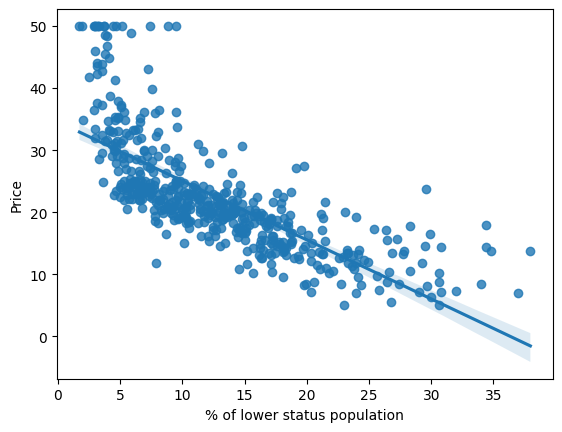

In [11]:
#plt.scatter(boston_df['MEDV'], boston_df['LSTAT'])
sns.regplot(boston_df, x='LSTAT', y='MEDV')
plt.xlabel('% of lower status population')
plt.ylabel('Price')

In [12]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

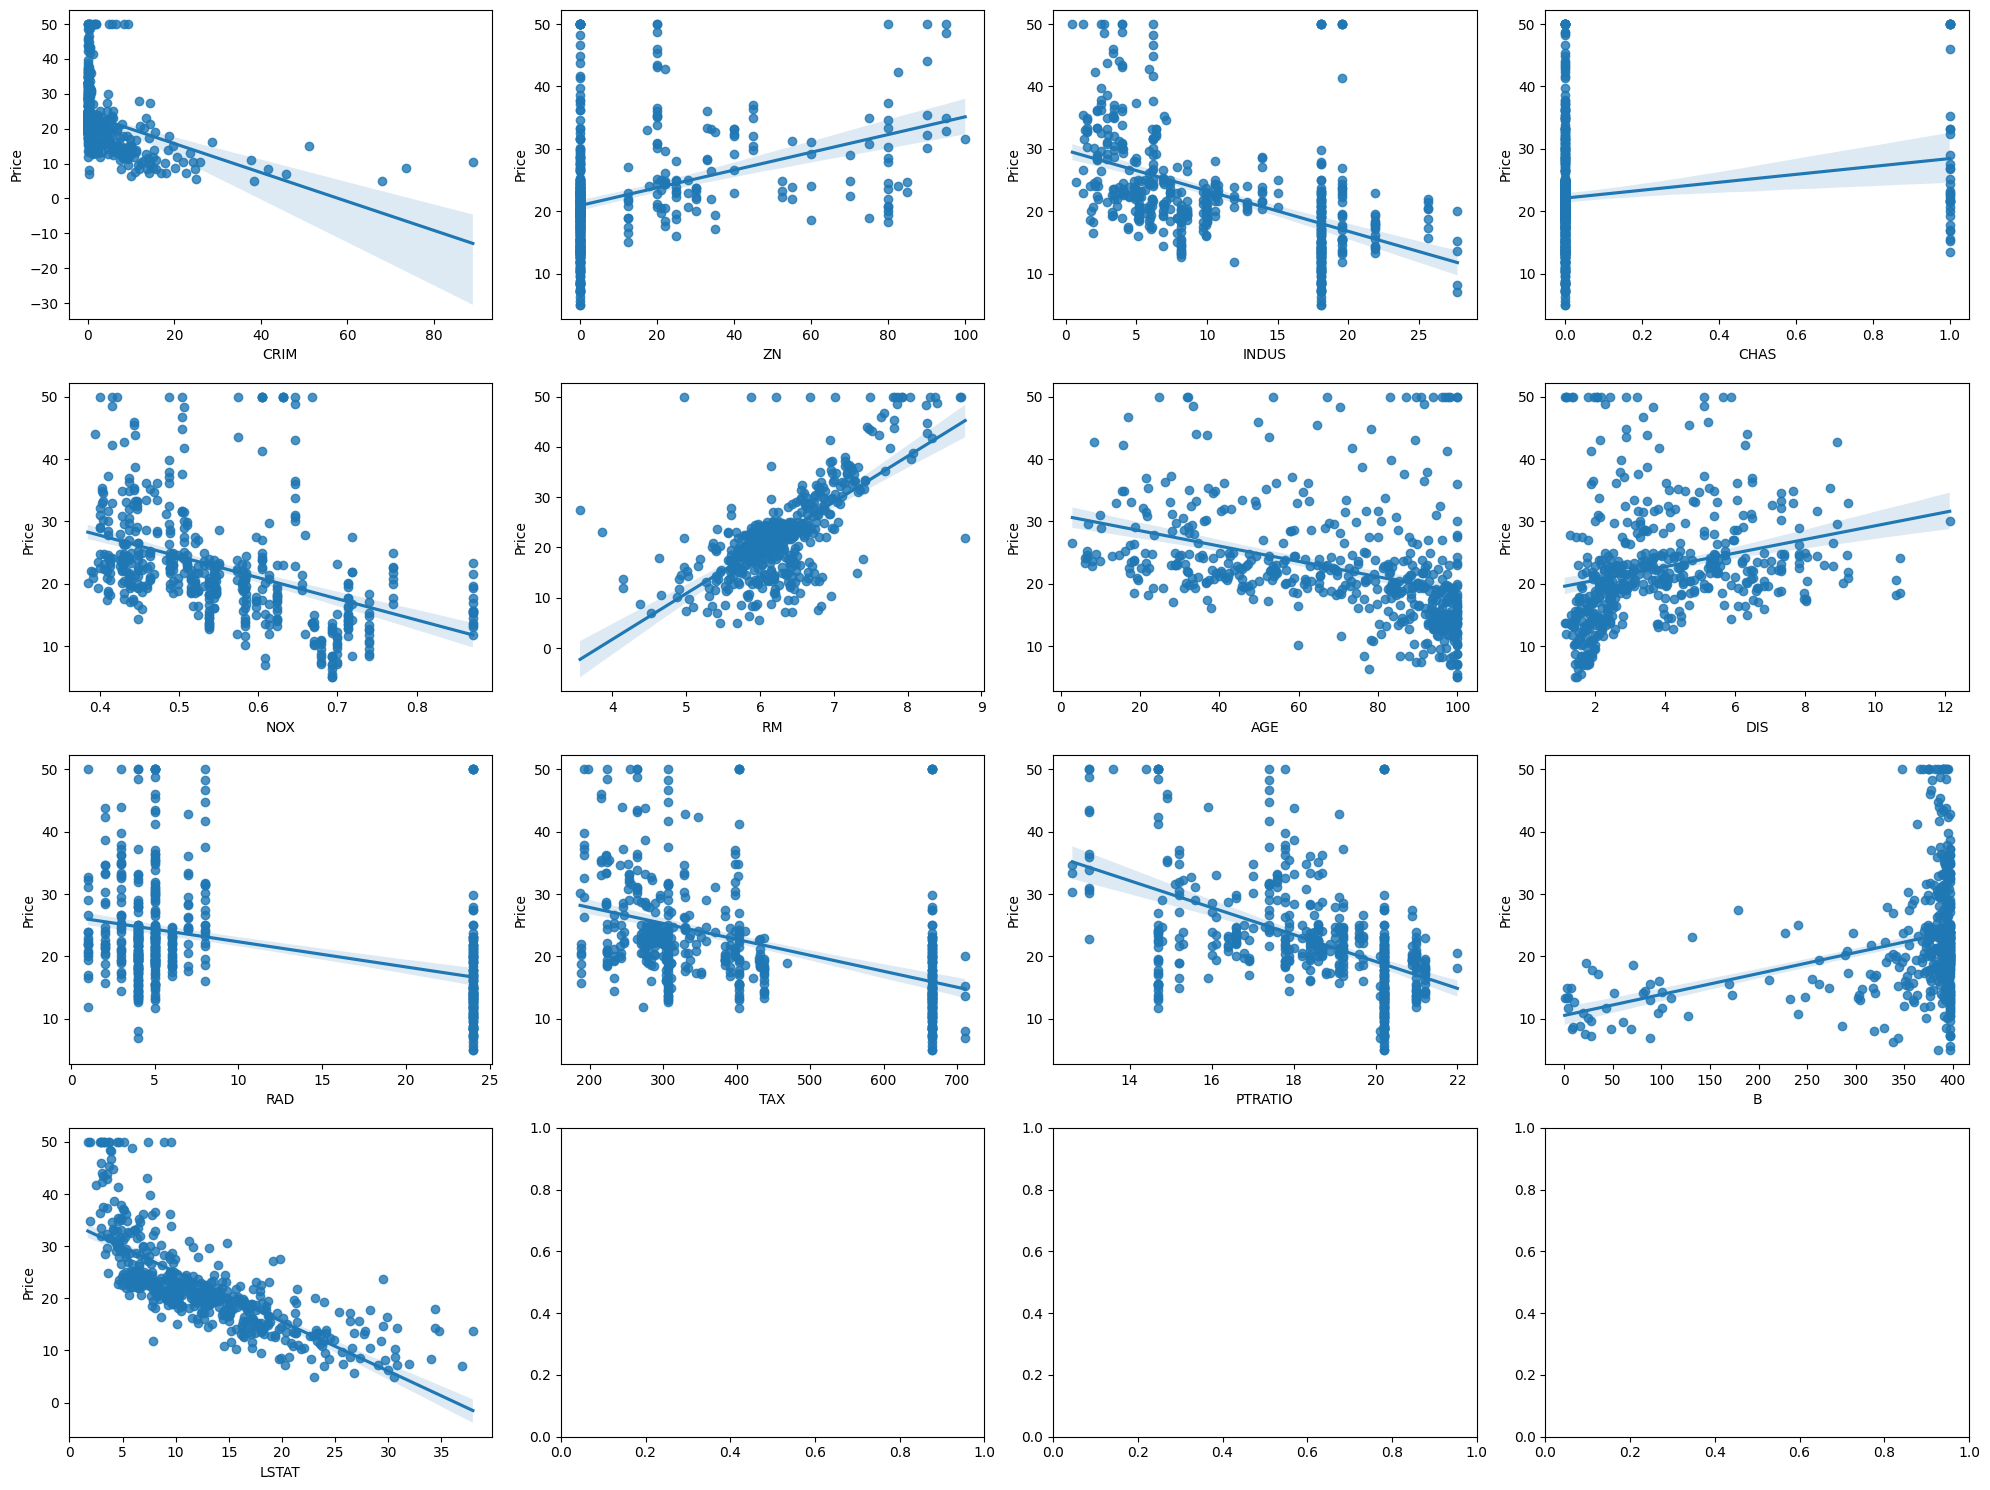

In [13]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = ['MEDV']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.regplot(ax=axes[i], data=boston_df, x=feature, y='MEDV')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [14]:
X = boston_df[features]
y = boston_df[target]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=40)

In [16]:
X_train.size

4602

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
import pickle
pickle.dump(scaler, open('scaled.pkl', 'wb'))

In [19]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [20]:
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
regression.coef_

array([[-0.6208519 ,  0.89604528, -0.4181019 ,  0.85794528, -1.98345156,
         2.34054146, -0.14708338, -2.8644969 ,  2.15413705, -1.58410776,
        -1.74439973,  0.6305477 , -3.22010917]])

In [22]:
regression.intercept_

array([22.33135593])

In [23]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [24]:
reg_pred = regression.predict(X_test)

In [25]:
reg_pred

array([[21.90897572],
       [32.36829283],
       [ 9.38919345],
       [16.40673353],
       [17.80964232],
       [31.83838312],
       [25.10363218],
       [15.4942598 ],
       [21.82825591],
       [-3.63190569],
       [26.12960431],
       [15.57300292],
       [ 5.61225053],
       [ 5.58756072],
       [25.41154332],
       [34.70503462],
       [26.17912943],
       [19.13532445],
       [23.91967422],
       [14.91252997],
       [39.53465438],
       [11.07641307],
       [36.58914352],
       [26.00446715],
       [38.64469005],
       [25.17973575],
       [21.75528189],
       [18.96547913],
       [18.27571802],
       [18.60093947],
       [24.62357132],
       [23.66620392],
       [29.6987949 ],
       [24.08585329],
       [ 0.50581275],
       [24.63764742],
       [25.21913509],
       [12.19902726],
       [39.4812705 ],
       [32.23454473],
       [23.75474746],
       [ 7.056712  ],
       [20.39810217],
       [21.0026853 ],
       [31.32729178],
       [ 7

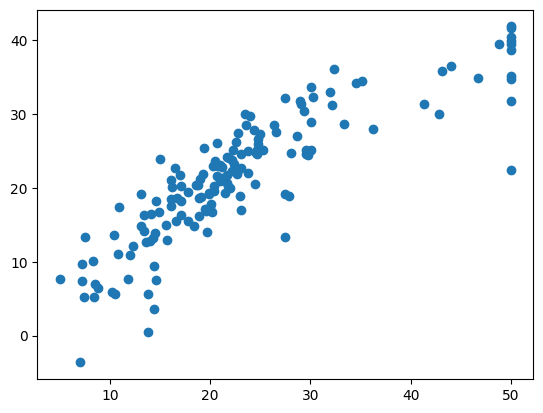

In [26]:
plt.scatter(y_test,reg_pred)

In [27]:
residuals = y_test - reg_pred
residuals

,MEDV
358,0.791024
197,-2.068293
48,5.010807
450,-3.006734
469,2.290358
...,...
212,-0.820692
133,3.526960
279,0.547971
274,-3.730522


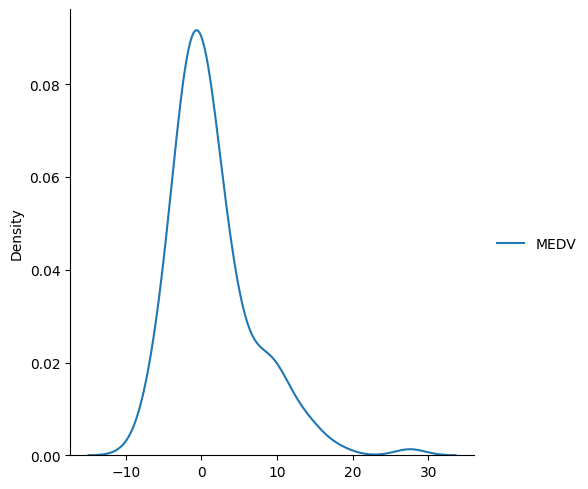

In [28]:
sns.displot(residuals, kind='kde')

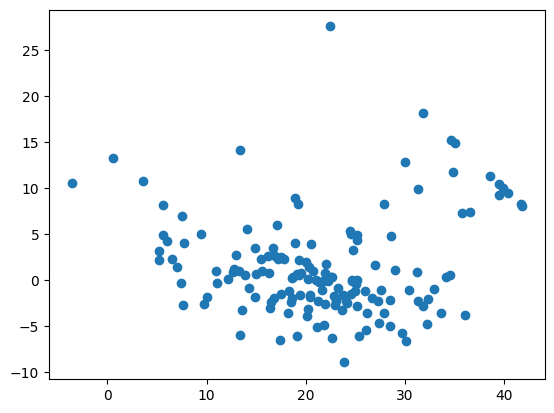

In [29]:
plt.scatter(reg_pred,residuals)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,reg_pred)
mae = mean_absolute_error(y_test,reg_pred)
rmse = np.sqrt(mse)
print("Mean squre error :", mse)
print("Mean absolute error :", mae)
print("Root Mean squre error :", rmse)

Mean squre error : 31.829631155557475
Mean absolute error : 3.907966145625519
Root Mean squre error : 5.641775532184657


In [31]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
score

0.7215519718844172

In [32]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6953213605401957

In [66]:
X_train[0].reshape(1,-1).shape

(1, 13)

In [69]:
regression.predict(X_train[0].reshape(1,-1))

array([[21.90120073]])

In [70]:
scaler.transform(X_train[0].reshape(1,-1))

c:\Users\dell\Documents\Abhishek\bhprediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ -0.55051442,  -0.476271  ,  -1.7189658 ,  -1.33308915,
        -12.11780991, -10.25711257,  -2.50348999,  -0.96900371,
         -1.10578547,  -2.41070299,  -8.8595524 ,  -3.82058423,
         -2.01295304]])

In [71]:
regression.predict(scaler.transform(X_train[0].reshape(1,-1)))

c:\Users\dell\Documents\Abhishek\bhprediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[45.95745902]])

In [72]:
import pickle

In [79]:
regression

LinearRegression()

In [81]:
pickle.dump(regression, open("reg_model.pkl", "wb"))

In [82]:
import pickle
import os

file_path = "reg_model.pkl"

if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    try:
        with open(file_path, "rb") as file:
            pickled_model = pickle.load(file)
    except EOFError:
        print("Error: The file is empty or corrupted.")
else:
    print("Error: The file does not exist or is empty.")

In [83]:
pickled_model.predict(scaler.transform(X_train[0].reshape(1,-1)))

c:\Users\dell\Documents\Abhishek\bhprediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[45.95745902]])